In [2]:
pip install python-doctr opencv-python



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import cv2
from doctr.io import DocumentFile

# Load image (replace with your file path)
img_path = "test.jpg"
img = cv2.imread(img_path)

# Preprocessing (grayscale + thresholding)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Save preprocessed image (optional)
cv2.imwrite("processed_image.jpg", thresh)

# Load image into docTR
doc = DocumentFile.from_images("test.jpg")

In [42]:
import cv2
import numpy as np

def correct_skew(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
    
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        angles.append(angle)
    
    median_angle = np.median(angles)
    if abs(median_angle) > 45:  # Vertical text
        if median_angle > 0:
            img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        else:
            img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    
    return img

rotated_img = correct_skew("rotated_output.jpg")
cv2.imwrite("rotated_output.jpg", rotated_img)

True

In [43]:
from doctr.models import ocr_predictor

# Load the OCR model (detection + recognition)
model = ocr_predictor(
    det_arch='db_resnet50', 
    reco_arch='crnn_vgg16_bn', 
    pretrained=True,
    detect_orientation=True
)

# Run OCR
result = model(doc)

In [44]:
text = " ".join([word.value for page in result.pages 
                 for block in page.blocks 
                 for line in block.lines 
                 for word in line.words])
print(text)

0 Ul apow 21 10Z/009 N on bgw 18A7 OI sno unlul eck Kou  asop JOAO KDE Guipe eoxe jou exipueduer A D Ip - D Sap D > X eopid >upps ul aJOIS - -  > - ( - out a ebosoa > 2 > a Qwojeopjod > -  a X e 0 C X > > - :suipjuop pooun yopg - > -  - a - S 3-1BIS X > > XX > >  -   0G 6 ( OGO 2 - A - 0  a - E 3 I 180DID YU I S X > A OSS ooa 063-18 5059-0j00 a  a a a a C 4 DWeppl pbey 0 N7 VZW Z8K ZEL-UIMIS unos 59710BOUM 2 buuwen > S pul ! eppw - - ON 011 6yW Z10Z/009 - snounly lec a bwesopJaAO bu C oxe aanpaeduervin Papoidoupp 8 Aup D U! auois


In [29]:
import re

def extract_medicine_info(text):
    # Batch patterns (e.g., "Batch: XYZ123", "Lot No. AB12CD")
    batch_patterns = [
        r"(B.No.)\s*[:]?\s*([A-Z0-9]{6,12})",
        r"\b([A-Z]{2,3}\d{4,8})\b"  # Generic alphanumeric code
    ]
    
    # Expiry patterns (e.g., "Exp: 2025-12-31", "Use Before 05/2026")
    expiry_patterns = [
        r"(Exp|Expiry|EXP.|Use By|Use Before)\s*[:]?\s*(\d{2,4}[/-]\d{2}[/-]\d{2,4}|\d{2}[/-]\d{4})",
        r"\b(\d{2}/\d{4})\b"  # MM/YYYY format
    ]
    
    # Search for matches
    batch = None
    expiry = None
    
    for pattern in batch_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            batch = match.group(2) if len(match.groups()) > 1 else match.group(1)
            break
    
    for pattern in expiry_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            expiry = match.group(2) if len(match.groups()) > 1 else match.group(1)
            break
    
    return {"Batch": batch, "Expiry": expiry}

# Example
info = extract_medicine_info(text)
print("Batch:", info["Batch"])
print("Expiry:", info["Expiry"])

Batch: D0853094
Expiry: None


ModuleNotFoundError: No module named 'mplcursors'

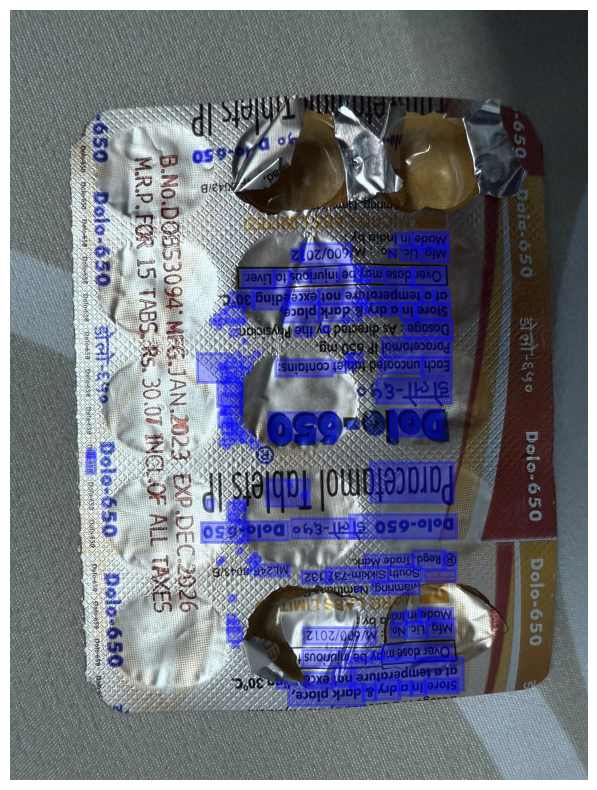

In [37]:
from doctr.utils.visualization import visualize_page

# Display OCR results
visualize_page(result.pages[0].export(), img)
cv2.waitKey(0)